In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/car_age_price.csv')

In [ ]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
data.shape

(112, 2)

In [ ]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [ ]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [ ]:
data.columns

Index(['Year', 'Price'], dtype='object')

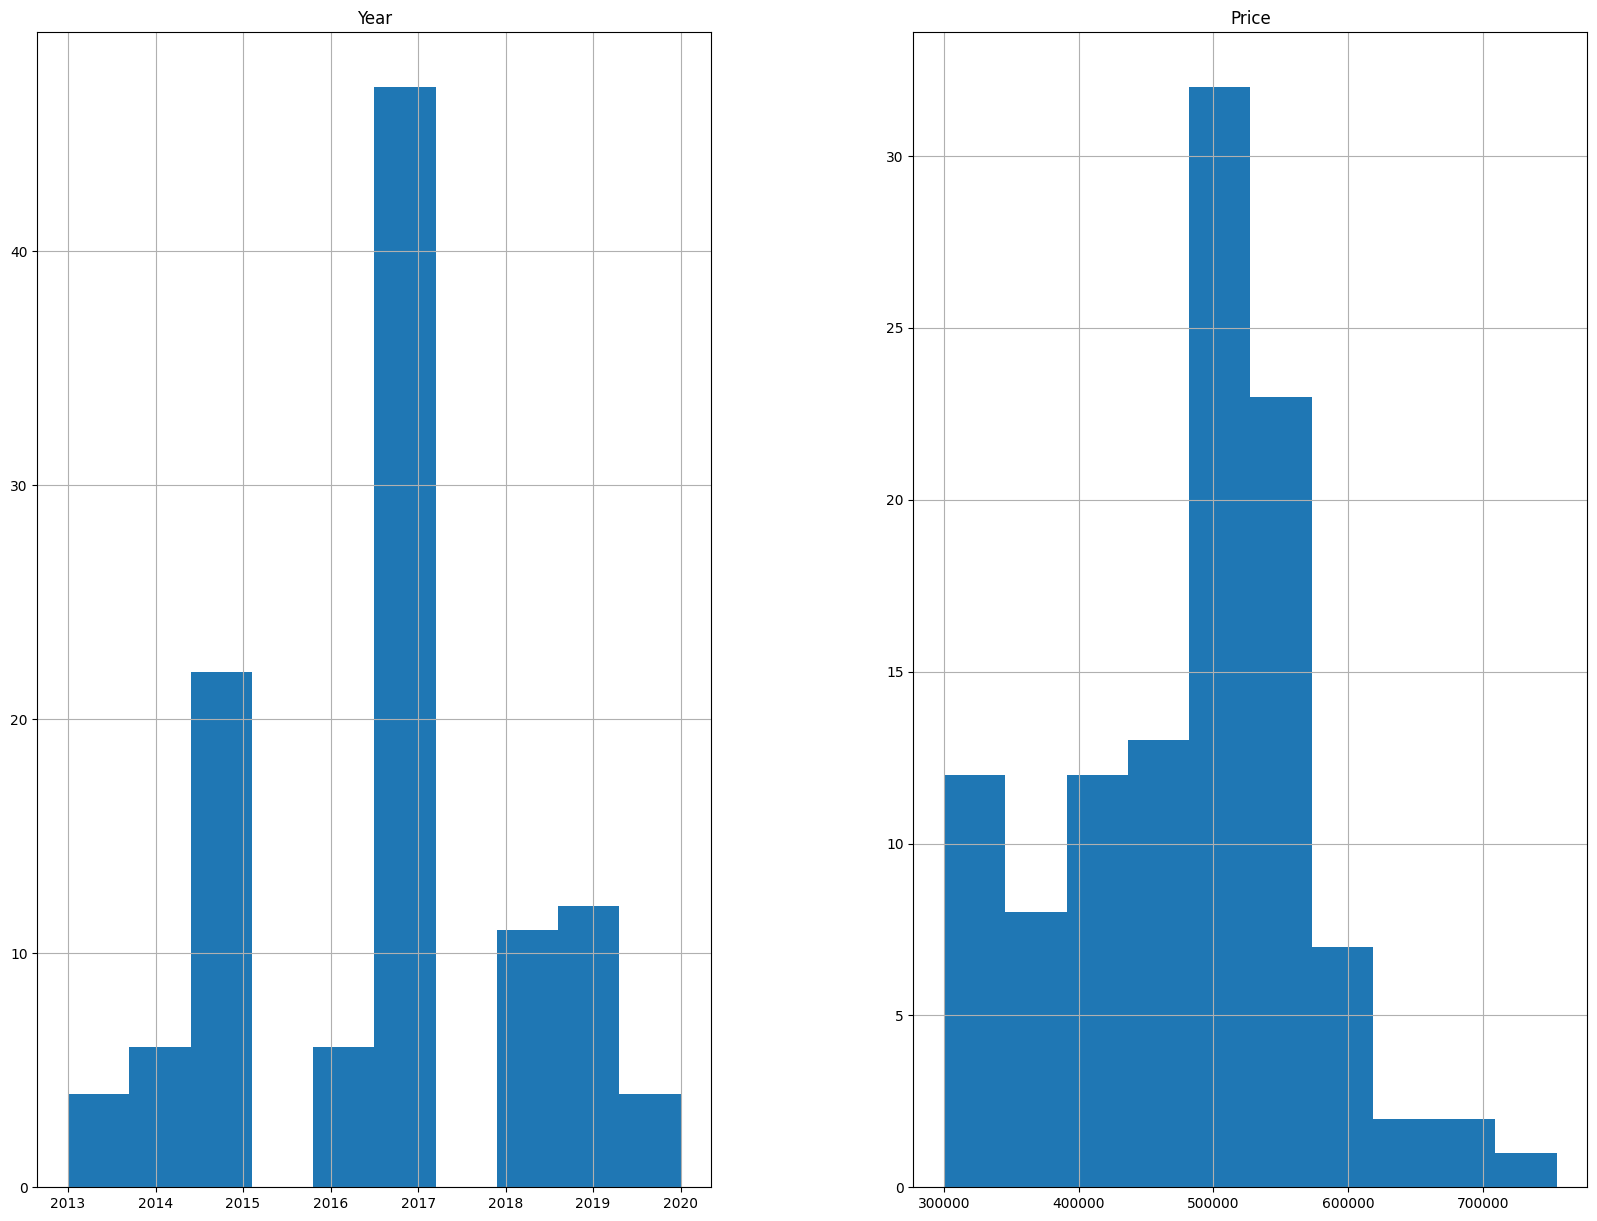

In [ ]:
data.hist(figsize=(20,15))
plt.show()

<Axes: >

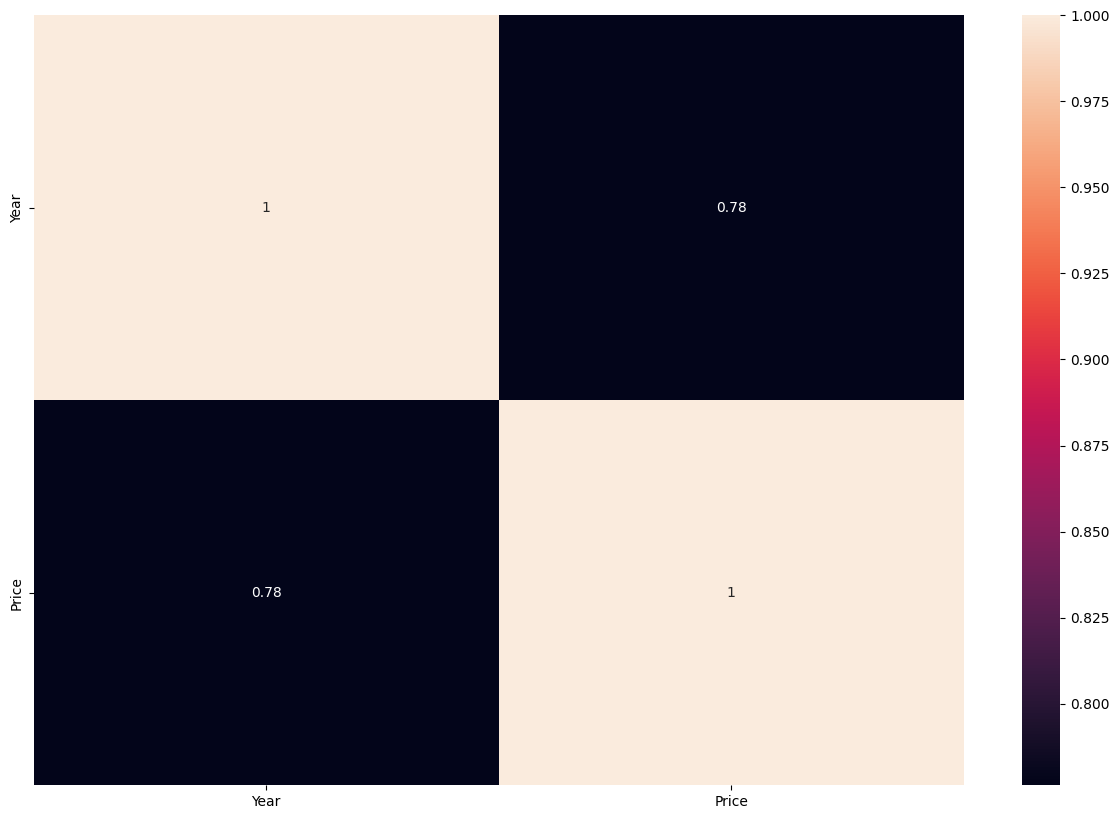

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix, annot = True)

In [ ]:
y = data['Price']

In [ ]:
x = data.drop(['Price'],axis = 1)

In [ ]:
x.shape

(112, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state=42)

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471275, 553167.34471275,
       553167.34471275, 410341.64128851, 505558.77690466, 553167.34471275,
       600775.91252081, 600775.91252081, 315124.50567236, 505558.77690466,
       410341.64128851, 648384.4803289 , 553167.34471275, 600775.91252081,
       315124.50567236, 410341.64128851, 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)
print ('MSE is: \n', mean_squared_error(y_test, predictions))


MSE is: 
 4326906256.830066


Higher MSE indicates greater error in predictions.

From Meansquared error-Not a good model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)
print ('R2 score is: \n', r2_score(y_test, predictions))

R2 score is: 
 0.3675931342589642


the model explains approximately 36.76% of the variance in the test data.

since r2 score is not near to 1-Not a good model

In [ ]:
year_2022 = np.array([[2022]])
predicted_price_2022 = model.predict(year_2022)

In [ ]:
predicted_price_2022

array([6.74166793e+08])

In [ ]:
print(f"The predicted price for a 2022 model is: {predicted_price_2022[0]:.2f}")

The predicted price for a 2022 model is: 665258333.60


In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50,max_iter= 100, tol =0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(x_test,y_test)

0.43638156366404157

model explains around 56.79% of the variance in the test data.

In [ ]:
lasso_reg.score(x_train,y_train)

0.6358754808305699

 model explains approximately 53.47% of the variance in the training data.